In [1]:
import numpy as np
import pandas as pd

In [2]:
from sklearn.datasets import load_wine

In [3]:
X, y = load_wine(return_X_y = True, as_frame = True)
type(X)

pandas.core.frame.DataFrame

In [4]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 13 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   alcohol                       178 non-null    float64
 1   malic_acid                    178 non-null    float64
 2   ash                           178 non-null    float64
 3   alcalinity_of_ash             178 non-null    float64
 4   magnesium                     178 non-null    float64
 5   total_phenols                 178 non-null    float64
 6   flavanoids                    178 non-null    float64
 7   nonflavanoid_phenols          178 non-null    float64
 8   proanthocyanins               178 non-null    float64
 9   color_intensity               178 non-null    float64
 10  hue                           178 non-null    float64
 11  od280/od315_of_diluted_wines  178 non-null    float64
 12  proline                       178 non-null    float64
dtypes: fl

In [5]:
X.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


In [6]:
X.columns

Index(['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium',
       'total_phenols', 'flavanoids', 'nonflavanoid_phenols',
       'proanthocyanins', 'color_intensity', 'hue',
       'od280/od315_of_diluted_wines', 'proline'],
      dtype='object')

In [7]:
from sklearn.model_selection import train_test_split

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

In [9]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression

In [10]:
c1=RandomForestClassifier(n_estimators = 10, max_depth = 5)
c2=DecisionTreeClassifier(max_depth = 5)
c3=LogisticRegression(multi_class = "multinomial")

In [11]:
c1.fit(X_train,y_train)
c2.fit(X_train,y_train)
c3.fit(X_train,y_train)

G:\Anaconda3\envs\boston-housing\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(multi_class='multinomial')

Brak transformacji danych bo modele wychodzą za dobre do celów porównawczych

In [12]:
c1.score(X_train, y_train), c1.score(X_test, y_test)

(1.0, 1.0)

In [13]:
c2.score(X_train, y_train), c2.score(X_test, y_test)

(1.0, 0.8888888888888888)

In [14]:
c3.score(X_train, y_train), c3.score(X_test, y_test)

(0.9849624060150376, 0.9111111111111111)

In [15]:
c1_w=c1.predict_proba(X_test)
c2_w=c2.predict_proba(X_test)
c3_w=c3.predict_proba(X_test)

In [16]:
avg=(c1_w+c2_w+c3_w)/3

In [17]:
avg.shape

(45, 3)

In [18]:
import matplotlib.pyplot as plt

In [19]:
probas_test=[c1_w,c2_w,c3_w,avg]

In [20]:
probas_test[0].shape

(45, 3)

In [21]:
idx=np.random.randint(0, len(y_test), 3)

In [22]:
idx

array([25, 12, 37])

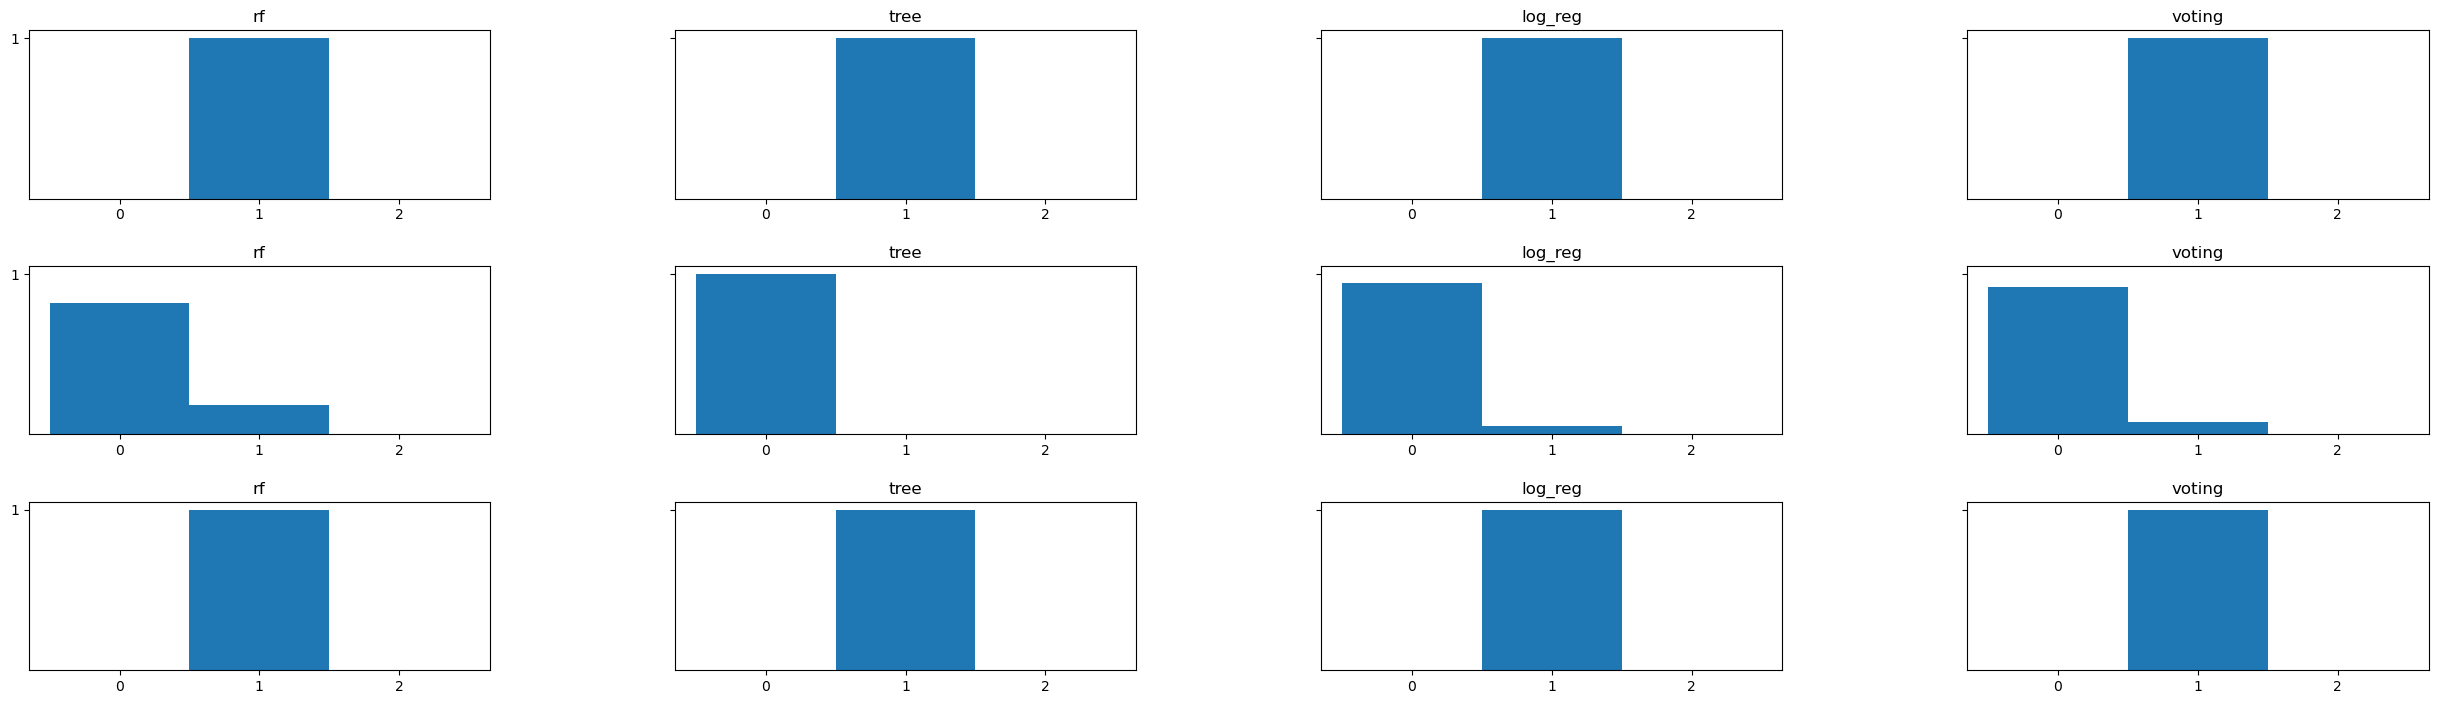

In [23]:
probas = np.array([np.take(clf_proba, idx, axis = 0) for clf_proba in probas_test])

probas_t = [probas[:, i, :] for i in range(3)]

fig, ax = plt.subplots(3, 4, figsize=(30, 8), sharey='row')
plt.setp(ax, xticks = list(range(10)), xticklabels = list(range(10)), yticks=[1, 2, 3])

j = 0

for est_proba in probas_t:
    i = 0
    for proba, name in zip(est_proba, ['rf', 'tree', 'log_reg', 'voting']):
        ax[j, i].bar(range(3), proba, width = 1)
        ax[j, i].set_title(name)
        i += 1
    j += 1
    
plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.4, 
                    hspace=0.4)

Bagging

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

In [25]:
y_train[73]

1

In [96]:
n=5
bagg_X=[]
temp_X=pd.concat([X_train],ignore_index=True)
for j in range(n):
    bagg_t=pd.DataFrame(columns=X_train.columns)
    for i in range (0,int(len(X_train))):
        rand=np.random.randint(0,int(len(X_train)))
        bagg_t.loc[i]=temp_X.loc[rand]
    bagg_X.insert(j,bagg_t)

In [97]:
bagg_X[0].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 133 entries, 0 to 132
Data columns (total 13 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   alcohol                       133 non-null    float64
 1   malic_acid                    133 non-null    float64
 2   ash                           133 non-null    float64
 3   alcalinity_of_ash             133 non-null    float64
 4   magnesium                     133 non-null    float64
 5   total_phenols                 133 non-null    float64
 6   flavanoids                    133 non-null    float64
 7   nonflavanoid_phenols          133 non-null    float64
 8   proanthocyanins               133 non-null    float64
 9   color_intensity               133 non-null    float64
 10  hue                           133 non-null    float64
 11  od280/od315_of_diluted_wines  133 non-null    float64
 12  proline                       133 non-null    float64
dtypes: fl

In [98]:
bagg_X[0].head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,13.05,1.73,2.04,12.4,92.0,2.72,3.27,0.17,2.91,7.20,1.12,2.91,1150.0
1,13.11,1.90,2.75,25.5,116.0,2.20,1.28,0.26,1.56,7.10,0.61,1.33,425.0
2,13.88,1.89,2.59,15.0,101.0,3.25,3.56,0.17,1.70,5.43,0.88,3.56,1095.0
3,14.34,1.68,2.70,25.0,98.0,2.80,1.31,0.53,2.70,13.00,0.57,1.96,660.0
4,14.19,1.59,2.48,16.5,108.0,3.30,3.93,0.32,1.86,8.70,1.23,2.82,1680.0


In [99]:
bagg_X[1].head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,13.84,4.12,2.38,19.5,89.0,1.80,0.83,0.48,1.56,9.01,0.57,1.64,480.0
1,13.48,1.67,2.64,22.5,89.0,2.60,1.10,0.52,2.29,11.75,0.57,1.78,620.0
2,12.52,2.43,2.17,21.0,88.0,2.55,2.27,0.26,1.22,2.00,0.90,2.78,325.0
3,13.49,3.59,2.19,19.5,88.0,1.62,0.48,0.58,0.88,5.70,0.81,1.82,580.0
4,12.16,1.61,2.31,22.8,90.0,1.78,1.69,0.43,1.56,2.45,1.33,2.26,495.0


In [100]:
bagg_X[2].head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0
1,12.08,1.33,2.30,23.6,70.0,2.20,1.59,0.42,1.38,1.74,1.07,3.21,625.0
2,13.83,1.65,2.60,17.2,94.0,2.45,2.99,0.22,2.29,5.60,1.24,3.37,1265.0
3,14.21,4.04,2.44,18.9,111.0,2.85,2.65,0.30,1.25,5.24,0.87,3.33,1080.0
4,13.05,3.86,2.32,22.5,85.0,1.65,1.59,0.61,1.62,4.80,0.84,2.01,515.0


In [101]:
bagg_X[3].head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,12.51,1.24,2.25,17.5,85.0,2.00,0.58,0.60,1.25,5.45,0.75,1.51,650.0
1,13.05,2.05,3.22,25.0,124.0,2.63,2.68,0.47,1.92,3.58,1.13,3.20,830.0
2,12.25,1.73,2.12,19.0,80.0,1.65,2.03,0.37,1.63,3.40,1.00,3.17,510.0
3,13.11,1.01,1.70,15.0,78.0,2.98,3.18,0.26,2.28,5.30,1.12,3.18,502.0
4,14.06,2.15,2.61,17.6,121.0,2.60,2.51,0.31,1.25,5.05,1.06,3.58,1295.0


In [102]:
bagg_X[4].head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,12.29,2.83,2.22,18.0,88.0,2.45,2.25,0.25,1.99,2.15,1.15,3.30,290.0
1,13.41,3.84,2.12,18.8,90.0,2.45,2.68,0.27,1.48,4.28,0.91,3.00,1035.0
2,12.72,1.75,2.28,22.5,84.0,1.38,1.76,0.48,1.63,3.30,0.88,2.42,488.0
3,14.34,1.68,2.70,25.0,98.0,2.80,1.31,0.53,2.70,13.00,0.57,1.96,660.0
4,12.85,1.60,2.52,17.8,95.0,2.48,2.37,0.26,1.46,3.93,1.09,3.63,1015.0


In [103]:
vcb=[RandomForestClassifier(n_estimators = 10, max_depth = 5)]*5
res=[]

In [104]:
for i in range(5):
    vcb[i].fit(bagg_X[i],y_train)
    res.insert(i,vcb[i].predict_proba(bagg_X[i]))

In [105]:
res[0].shape

(133, 3)

In [106]:
avgb=sum(res)/5

In [107]:
avgb.shape

(133, 3)

In [108]:
probas_testb=[]
for i in range(5):
    probas_testb.insert(i,res[i])
probas_testb.append(avgb)
probas_testb[5].shape

(133, 3)

In [109]:
idx=np.random.randint(0, len(y_test), 5)
idx

array([41, 12, 34, 23, 20])

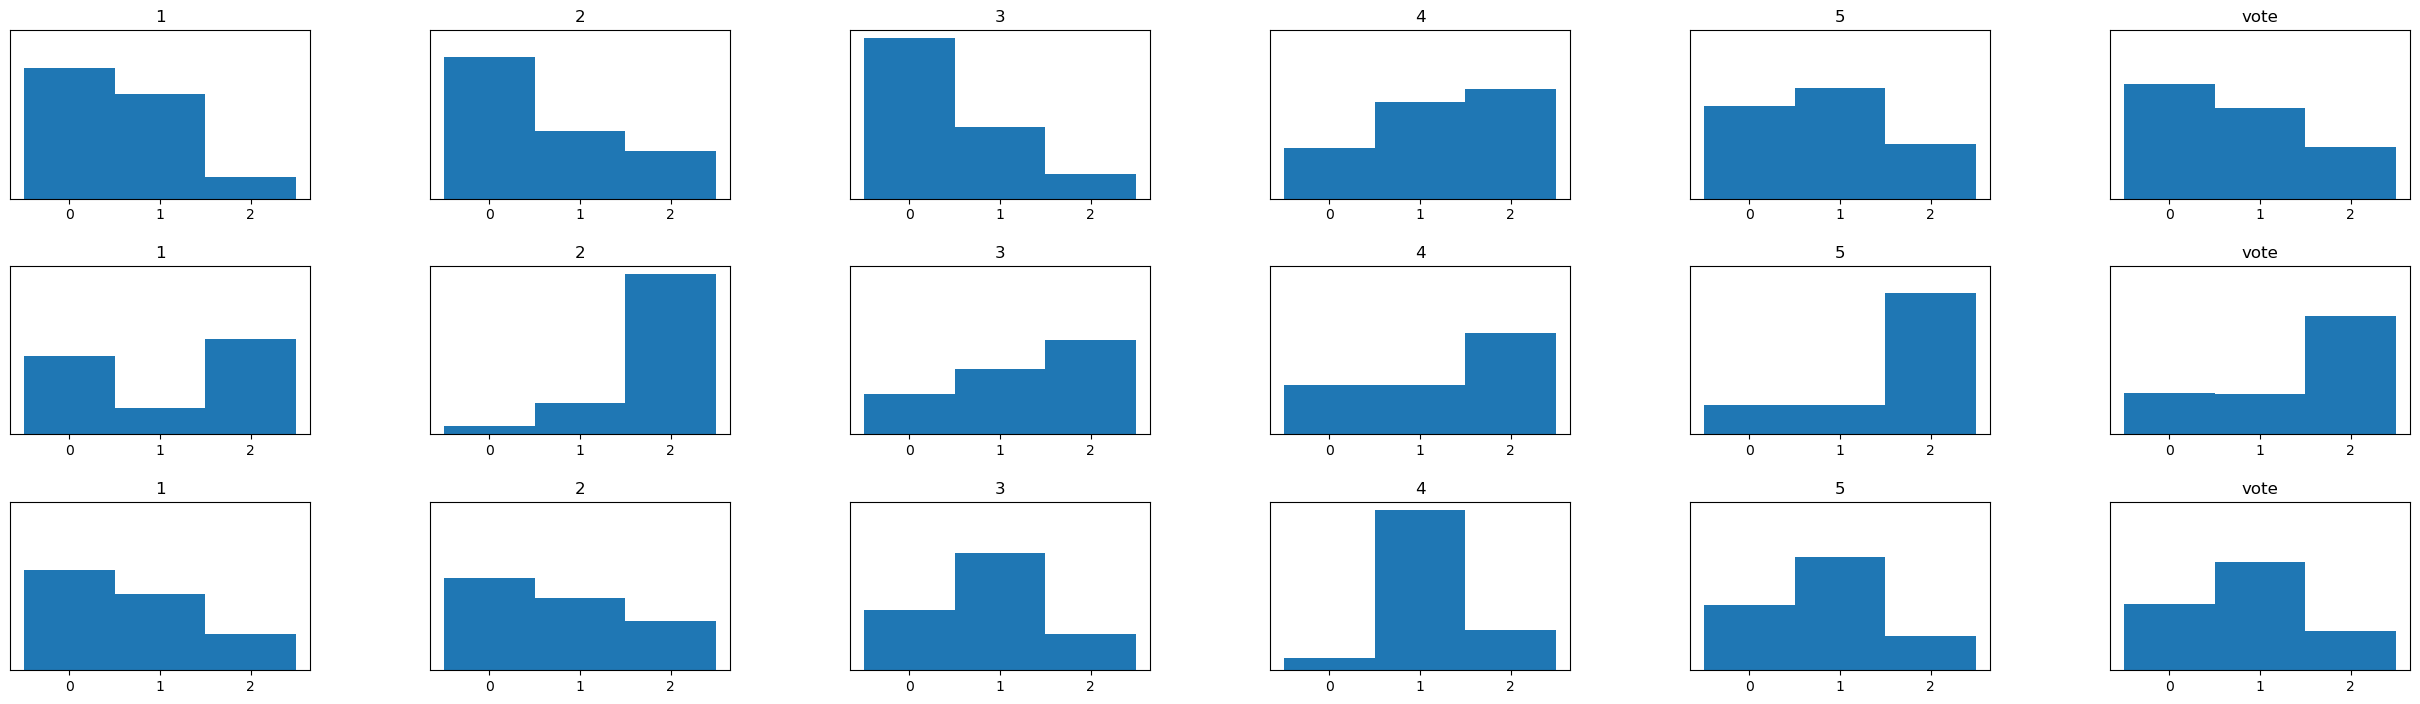

In [110]:
probas = np.array([np.take(clf_proba, idx, axis = 0) for clf_proba in probas_testb])

probas_t = [probas[:, i, :] for i in range(3)]

fig, ax = plt.subplots(3, 6, figsize=(30, 8), sharey='row')
plt.setp(ax, xticks = list(range(10)), xticklabels = list(range(10)), yticks=[1, 2, 3])

j = 0

for est_proba in probas_t:
    i = 0
    for proba, name in zip(est_proba, ['1', '2', '3', '4','5','vote']):
        ax[j, i].bar(range(3), proba, width = 1)
        ax[j, i].set_title(name)
        i += 1
    j += 1
    
plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.4, 
                    hspace=0.4)